In [5]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [6]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze4-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'tuple'>
('1', '0', '0', '0', '1', '0', '0', '0')

■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ A □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [7]:
from lcs.agents.xncs import XNCS, Configuration
from utils.nxcs_utils import *


In [8]:
cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    mutation_chance=0.08,
                    chi=0.8,
                    ga_threshold=25,
                    deletion_threshold=25,
                    delta=0.1,
                    initial_error=0.01,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20
                   )


In [9]:
agent = XNCS(cfg)
explore_population, explore_metrics =\
    agent.explore(maze, 1000, True)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': 0.0, 'perf_time': 0.024100099999998292, 'numerosity': 74, 'population': 66, 'average_specificity': 1.864864864864865, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 26, 'reward': 1000.138880235737, 'perf_time': 0.329812000000004, 'numerosity': 1800, 'population': 1192, 'average_specificity': 8.991666666666667, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': 1.3360874108178934e-12, 'perf_time': 0.8133116999999856, 'numerosity': 1800, 'population': 1330, 'average_specificity': 11.657222222222222, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 14, 'reward': 1011.437914927404, 'perf_time': 0.24458859999998595, 'numerosity': 1800, 'population': 1355, 'average_specificity': 13.273888888888889, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 35, 'reward': 1000.0110957432273, 'perf_

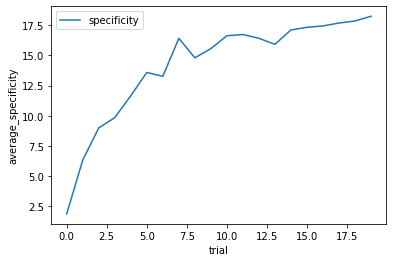

In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["average_specificity"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


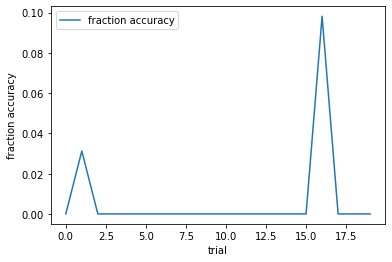

In [11]:
df = pd.DataFrame(metric["fraction_accuracy"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])


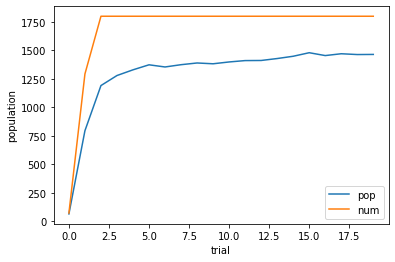

In [12]:

df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []


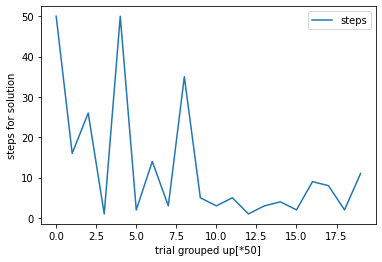

In [13]:


xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
